In [2]:
!pip3 install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 6.8 MB/s eta 0:00:00


In [20]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor, plot_importance
from sklearn import datasets
from sklearn.model_selection import train_test_split
import shap
from xgboost import XGBRegressor, DMatrix

In [21]:
X, y = datasets.fetch_openml('boston', return_X_y=True)

# 범주형 변수를 category 타입으로 변환
for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [24]:
# DMatrix 생성 시 enable_categorical=True로 설정
dtrain = DMatrix(X_train, label=y_train, enable_categorical=True)
dtest = DMatrix(X_test, label=y_test, enable_categorical=True)

# 모델 학습
model = XGBRegressor(tree_method='hist', enable_categorical=True)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [25]:
# load js
shap.initjs()

'''
KernelExplainer() : KNN, SVM, RandomForest, GBM, H2O
TreeExplainer() : tree-based machine learning model (faster)
DeepExplainer() : deep learning model
'''

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# force_plot
## 특정 데이터 하나 & 전체 데이터에 대해, Shapley Value를 1차원 평면에 정렬해서 보여줌.

In [27]:
# 첫 번째 데이터에 대한 SHAP 시각화
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])

In [28]:
# Outlier 에 대한 SHAP 시각화
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[259,:], X_train.iloc[259,:])

# 주요 업무지까지 거리가 가깝고 (DIS), 주변 지역에 하위 계층 사람들이 적게 살면서 (LSTAT), 범죄율이 극도로 낮으므로 (CRIM), 주택 자체의 상태보다 주변 환경에 의해 좋은 집값이 형성되었음을 알 수 있습니다.

In [29]:
# 전체 데이터에 대한 SHAP 시각화
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_train)

# dependence_plot
## Feature 하나에 대한 SHAP 영향력을 보여줌.

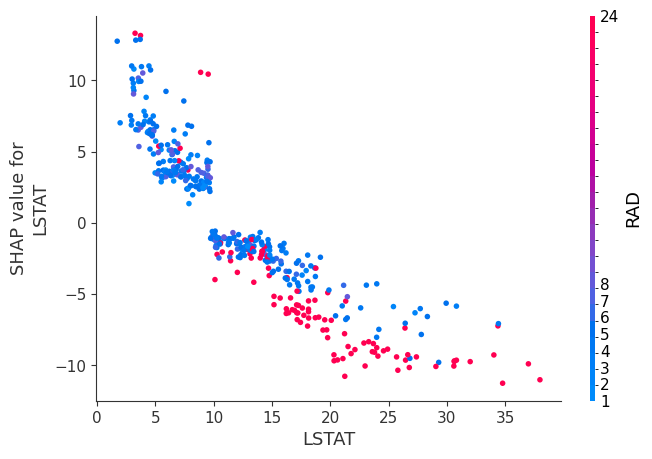

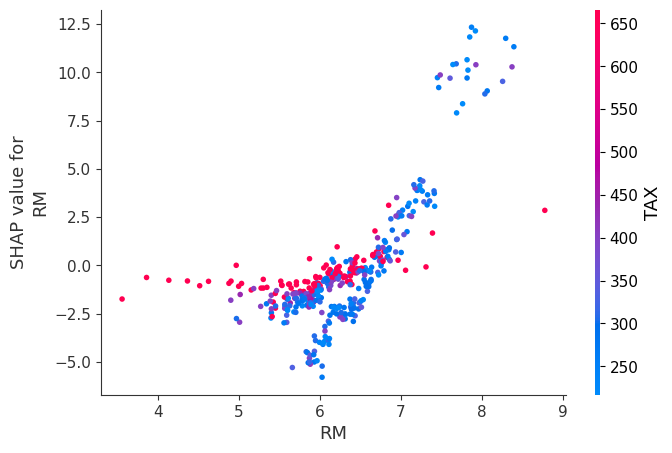

In [30]:
shap.initjs()
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))  # (13, ) : 각각의 Feature 에 대해 shap value 다 더한 것

# make SHAP plots of the three most important features
for i in range(2):
    shap.dependence_plot(top_inds[i], shap_values, X_train)

# summary_plot

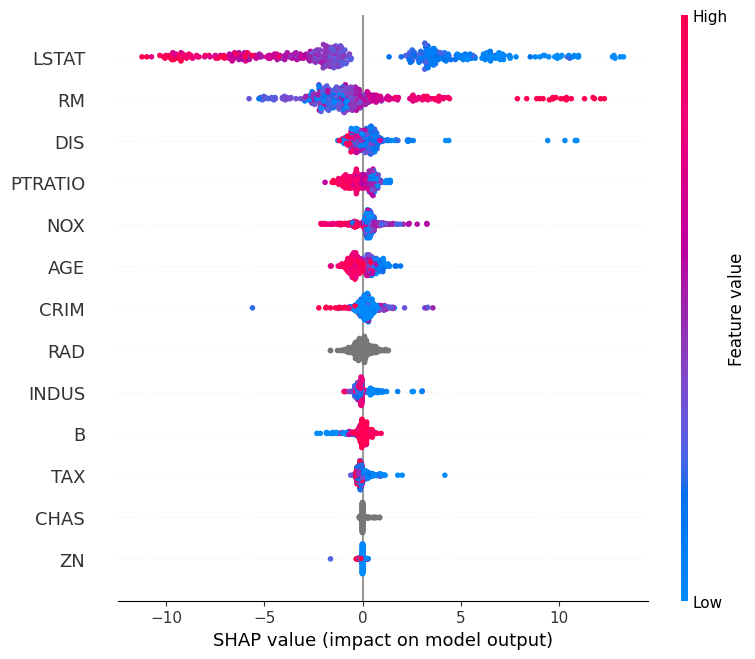

In [31]:
# 전체 Feature 들이 Shapley Value 분포에 어떤 영향을 미치는지 시각화
shap.summary_plot(shap_values, X_train)

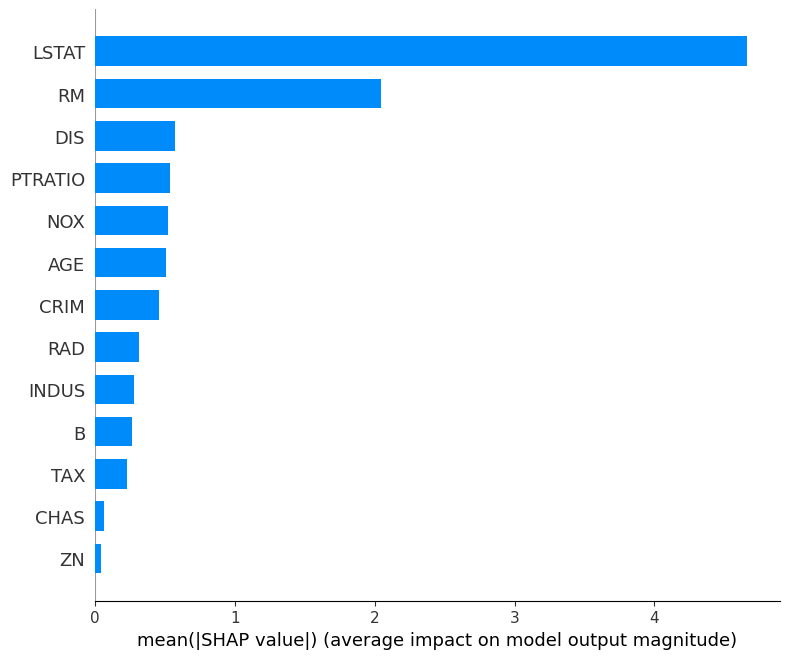

In [35]:
# 각 Feature 가 모델에 미치는 절대 영향도를 파악
shap.summary_plot(shap_values, X_train, plot_type='bar')